In [0]:
from math import sqrt
import numpy as np

valid_amino_acids = {
    'LLP': 'K', 'TPO': 'T', 'CSS': 'C', 'OCS': 'C', 'CSO': 'C', 'PCA': 'E', 'KCX': 'K', \
    'CME': 'C', 'MLY': 'K', 'SEP': 'S', 'CSX': 'C', 'CSD': 'C', 'MSE': 'M', \
    'ALA': 'A', 'ASN': 'N', 'CYS': 'C', 'GLN': 'Q', 'HIS': 'H', 'LEU': 'L', \
    'MET': 'M', 'MHO': 'M', 'PRO': 'P', 'THR': 'T', 'TYR': 'Y', 'ARG': 'R', 'ASP': 'D', \
    'GLU': 'E', 'GLY': 'G', 'ILE': 'I', 'LYS': 'K', 'PHE': 'F', 'SER': 'S', \
    'TRP': 'W', 'VAL': 'V', 'SEC': 'U'
    }

def check_pdb_valid_row(valid_amino_acids, l):
    if (get_pdb_rname(l) in valid_amino_acids.keys()) and (l.startswith('ATOM') or l.startswith('HETA')):
        return True
    return False

def get_pdb_atom_name(l):
    return l[12: 16].strip()

def get_pdb_rnum(l):
    return int(l[22: 27].strip())

def get_pdb_rname(l):
    return l[17: 20].strip()

def get_pdb_xyz_cb(lines):
    xyz = {}
    for l in lines:
        if get_pdb_atom_name(l) == 'CB':
            xyz[get_pdb_rnum(l)] = (float(l[30:38].strip()), float(l[38:46].strip()), float(l[46:54].strip()))
    for l in lines:
        if (get_pdb_rnum(l) not in xyz) and get_pdb_atom_name(l) == 'CA':
            xyz[get_pdb_rnum(l)] = (float(l[30:38].strip()), float(l[38:46].strip()), float(l[46:54].strip()))
    return xyz

def get_pdb_xyz_ca(lines):
    xyz = {}
    for l in lines:
        if get_pdb_atom_name(l) == 'CA':
            xyz[get_pdb_rnum(l)] = (float(l[30:38].strip()), float(l[38:46].strip()), float(l[46:54].strip()))
    return xyz

def get_dist_maps(valid_amino_acids, file_pdb):
    f = open(file_pdb, mode = 'r')
    flines = f.read()
    f.close()
    lines = flines.splitlines()
    templines = flines.splitlines()
    for l in templines:
        if not l.startswith('ATOM'):
            lines.remove(l)
    rnum_rnames = {}
    for l in lines:
        atom = get_pdb_atom_name(l)
        if atom != 'CA':
            continue
        #if int(get_pdb_rnum(l)) in rnum_rnames:
            #warnings.warn ('Warning!! ' + file_pdb + ' - multiple CA rows - rnum = ' + str(get_pdb_rnum(l)))
        if not get_pdb_rname(l) in valid_amino_acids.keys():
            print ('' + get_pdb_rname(l) + ' is unknown amino acid in ' + l)
            sys.exit(1)
        rnum_rnames[int(get_pdb_rnum(l))] = valid_amino_acids[get_pdb_rname(l)]
    seq = ""
    for i in range(max(rnum_rnames.keys())):
        if i+1 not in rnum_rnames:
            print (rnum_rnames)
            print ('Error! ' + file_pdb + ' ! residue not defined for rnum = ' + str(i+1))
            sys.exit (1)
        seq = seq + rnum_rnames[i+1]
    L = len(seq)
    xyz_cb = get_pdb_xyz_cb(lines)
    if len(xyz_cb) != L:
        print(rnum_rnames)
        for i in range(L):
            if i+1 not in xyz_cb:
                print('XYZ not defined for ' + str(i+1))
        print ('Error! ' + file_pdb + ' Something went wrong - len of cbxyz != seqlen!! ' + str(len(xyz_cb)) + ' ' +  str(L))
        sys.exit(1)
    cb_map = np.zeros((L, L))
    for r1 in sorted(xyz_cb):
        (a, b, c) = xyz_cb[r1]
        for r2 in sorted(xyz_cb):
            (p, q, r) = xyz_cb[r2]
            cb_map[r1 - 1, r2 - 1] = sqrt((a-p)**2+(b-q)**2+(c-r)**2)
    xyz_ca = get_pdb_xyz_ca(lines)
    if len(xyz_ca) != L:
        print ('Something went wrong - len of cbxyz != seqlen!! ' + str(len(xyz_ca)) + ' ' +  str(L))
        sys.exit(1)
    ca_map = np.zeros((L, L))
    for r1 in sorted(xyz_ca):
        (a, b, c) = xyz_ca[r1]
        for r2 in sorted(xyz_ca):
            (p, q, r) = xyz_ca[r2]
            ca_map[r1 - 1, r2 - 1] = sqrt((a-p)**2+(b-q)**2+(c-r)**2)
    '''
    any_map = np.full((L, L), np.inf)
    for l1 in lines:
        if not check_pdb_valid_row(check_pdb_valid_row, l1):
            continue
        r1 = get_pdb_rnum(l1)
        (a, b, c) = (float(l1[30:38].strip()), float(l1[38:46].strip()), float(l1[46:54].strip()))
        for l2 in lines:
            if not check_pdb_valid_row(check_pdb_valid_row, l2):
                continue
            r2 = get_pdb_rnum(l2)
            (p, q, r) = (float(l2[30:38].strip()), float(l2[38:46].strip()), float(l2[46:54].strip()))
            d = sqrt((a-p)**2+(b-q)**2+(c-r)**2)
            if any_map[r1 - 1, r2 - 1] > d:
                any_map[r1 - 1, r2 - 1] = d
    return L, seq, cb_map, ca_map, any_map
    '''
    return L, seq, cb_map, ca_map


In [0]:
from google.colab import files
x = files.upload()

Saving S_00000006.pdb to S_00000006.pdb


In [18]:
from google.colab import files
x = files.upload()

Saving T0957s2.pdb to T0957s2.pdb


In [0]:
from google.colab import files
x = files.upload()

Saving T0957s2.realdist.distmap.npy to T0957s2.realdist.distmap.npy


In [0]:
(L, seq, cb_map, ca_map) = get_dist_maps(valid_amino_acids, 'S_00000006.pdb')
cb_map[cb_map > 20] = 20

In [22]:
PredictedMAP = np.load('T0957s2.realdist.distmap.npy')[:, :, 0]
PredictedMAP[PredictedMAP > 20] = 20
print(PredictedMAP.shape)

(164, 164)


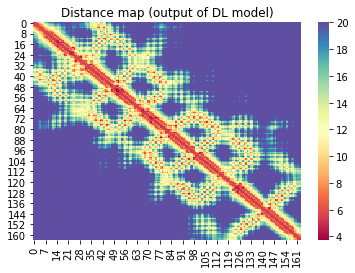

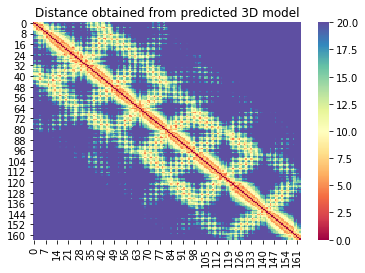

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(PredictedMAP, cmap='Spectral')
plt.title('Distance map (output of DL model)')
plt.show()

sns.heatmap(cb_map, cmap='Spectral')
plt.title('Distance obtained from predicted 3D model')
plt.show()